In [2]:
from rdkit.Chem import AllChem, Draw
import matplotlib.pyplot as plt
import itertools
import numpy as np
import os
import sys
parent_path=os.path.dirname(os.getcwd())
sys.path.append(parent_path+'/src')
from predict import predict

c:\Users\chung\anaconda3\envs\syncat\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
def visual_rsmi(rsmi):
    reaction=AllChem.ReactionFromSmarts(rsmi,useSmiles=True)
    return display(Draw.ReactionToImage(reaction))

In [4]:
def summarize_attention(values: list[float]) -> list:
    disc = 1 + 8 * len(values)
    # take the positive root
    N = int((-1 + np.sqrt(disc)) / 2)
    
    lst_att=[]
    for i in range(N):
        total = values[i]
        for idx, (a, b) in enumerate(itertools.combinations(range(N), 2)):
            if i in (a, b):
                total += values[N + idx]
        lst_att.append(total)
    return lst_att

In [5]:
def visualize_1d_heatmap(data, title="1D Heatmap", xlabel="Index", ylabel="Value", cmap="Blues"):

    data_array = np.array(data).reshape(1, -1)  # Reshape to a 2D array (1 row)
    plt.figure(figsize=(5,len(data)))
    plt.imshow(data_array, cmap=cmap, aspect=0.7)
    plt.xlabel('Attention weights')
    plt.yticks([]) # Remove y-axis ticks.
    plt.xticks([])
    # Add the numerical values to each cell.
    for i in range(data_array.shape[0]):
        for j in range(data_array.shape[1]):
            plt.text(j, i, format(data_array[i, j], ".2f"),  # Format the value.
                     ha="center", va="center", color="black")
    
    # Add grid lines.
    plt.xticks(np.arange(data_array.shape[1] + 1) - 0.5, minor=True)
    plt.yticks(np.arange(data_array.shape[0] + 1) - 0.5, minor=True)
    plt.grid(which="minor", color='black', linestyle='-', linewidth=1)
    plt.tick_params(which="minor", bottom=False, left=False) # remove minor ticks
    plt.show()

In [6]:
def attention(rsmi,model='model_tpl'):
    rsmi = rsmi
    visual_rsmi(rsmi)

    #Using SynCat to predict and extract attention weights
    print('*'*100)
    rsmi_lst=[rsmi]
    prediction=predict(rsmi_lst,model_name=model)

    #[batch][index to get informations with their orders: label, att_reactants, att_products, reaction_embeddings][sample_order]
    print('*'*100)
    attention_reactants = prediction[0][-3][0]
    attention_products = prediction[0][-2][0]

    print('Attention weights for reactants:\t')
    attention_reactants=summarize_attention(attention_reactants)
    visualize_1d_heatmap(attention_reactants)

    print('Attention weights for products:\t')
    attention_products=summarize_attention(attention_products)
    visualize_1d_heatmap(attention_products)

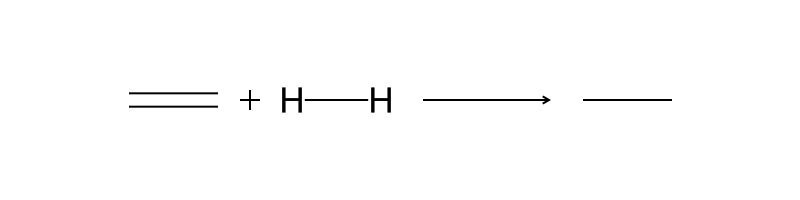

****************************************************************************************************
--- generating graph data for None
--- n_reactions: 1, reactant_max_cnt: 2, product_max_cnt: 1


Prediction: 100%|██████████| 1/1 [00:00<00:00, 173.82it/s]

****************************************************************************************************
Attention weights for reactants:	


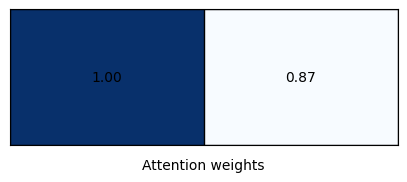

Attention weights for products:	


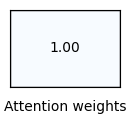

In [7]:
rsmi = 'C=C.[H][H]>>CC'
attention(rsmi)

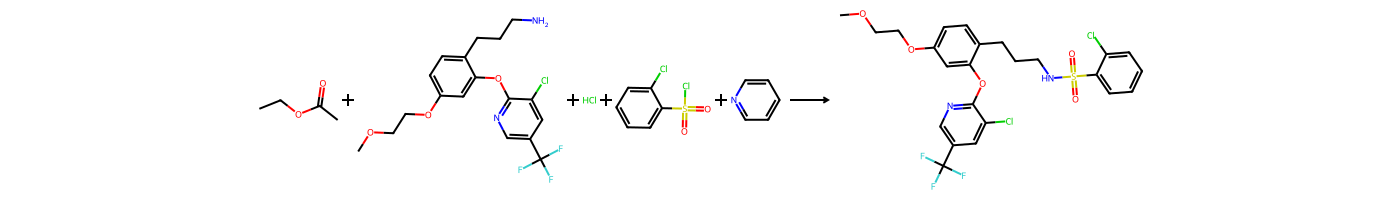

****************************************************************************************************
--- generating graph data for None
--- n_reactions: 1, reactant_max_cnt: 5, product_max_cnt: 1


Prediction: 100%|██████████| 1/1 [00:00<00:00, 41.68it/s]

****************************************************************************************************
Attention weights for reactants:	


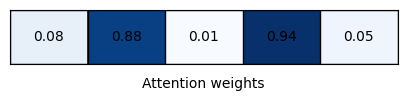

Attention weights for products:	


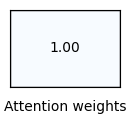

In [8]:
rsmi = 'CCOC(C)=O.COCCOc1ccc(CCCN)c(Oc2ncc(C(F)(F)F)cc2Cl)c1.Cl.O=S(=O)(Cl)c1ccccc1Cl.c1ccncc1>>COCCOc1ccc(CCCNS(=O)(=O)c2ccccc2Cl)c(Oc2ncc(C(F)(F)F)cc2Cl)c1'
attention(rsmi)

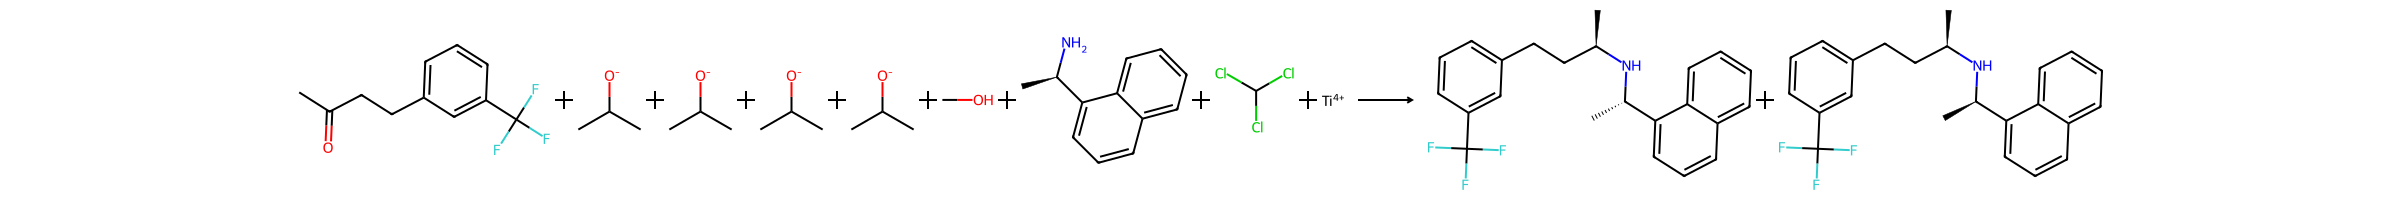

****************************************************************************************************
--- generating graph data for None
--- n_reactions: 1, reactant_max_cnt: 9, product_max_cnt: 2


Prediction: 100%|██████████| 1/1 [00:00<00:00, 26.51it/s]

****************************************************************************************************
Attention weights for reactants:	


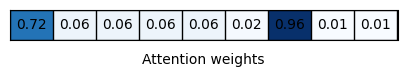

Attention weights for products:	


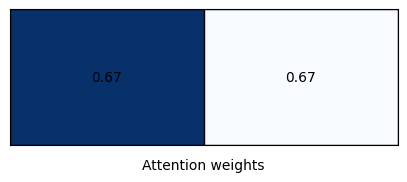

In [9]:
rsmi='CC(=O)CCc1cccc(C(F)(F)F)c1.CC(C)[O-].CC(C)[O-].CC(C)[O-].CC(C)[O-].CO.C[C@@H](N)c1cccc2ccccc12.ClC(Cl)Cl.[Ti+4]>>C[C@H](CCc1cccc(C(F)(F)F)c1)N[C@@H](C)c1cccc2ccccc12.C[C@H](CCc1cccc(C(F)(F)F)c1)N[C@H](C)c1cccc2ccccc12'
attention(rsmi)